In [39]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing
import sklearn.feature_selection
import sklearn.ensemble 
import sklearn.model_selection
import tensorflow as tf
import matplotlib.pyplot as plt
SEED = 68

In [40]:
os.chdir("c:\\Users\\denis\\OneDrive\\Desktop\\Programming\\Python\\Toxicity_project")
df = pd.read_csv("toxicity-2\data.csv")

In [41]:
X = df.drop('Class', axis=1)
y = df['Class']
selector = sklearn.feature_selection.VarianceThreshold(threshold=1.0)
X_selected = selector.fit_transform(X)


In [42]:
X = pd.DataFrame(X_selected)
X.shape

(171, 523)

In [43]:

scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
y_binary = y.map({'Toxic': 1, 'NonToxic': 0}).astype(int)

In [44]:
estimator = sklearn.ensemble.RandomForestClassifier(n_estimators=50, random_state=SEED)

rfecv = sklearn.feature_selection.RFECV(estimator=estimator, step=1, min_features_to_select=20, cv=sklearn.model_selection.StratifiedKFold(5), scoring='f1', n_jobs=-1)

rfecv.fit(X_scaled, y_binary)
X_alive = rfecv.transform(X_scaled)


In [45]:
estimator = sklearn.ensemble.RandomForestClassifier(n_estimators=50, random_state=SEED)

rfecv = sklearn.feature_selection.RFECV(estimator=estimator, step=1, min_features_to_select=20, cv=sklearn.model_selection.StratifiedKFold(5), scoring='f1', n_jobs=-1)

rfecv.fit(X, y_binary)
Xog_alive = rfecv.transform(X)

In [46]:
X_alive_df = pd.DataFrame(X_alive)
Xog_alive_df = pd.DataFrame(Xog_alive)


In [47]:
X_alive_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,2.092225,-0.230813,0.287414,-0.468451,5.936024,1.634481,-0.227018,1.921522,-1.294399,1.695300,...,0.518979,-3.284725,5.968571,-0.411497,1.294736,2.023033,5.946016,0.224046,0.197797,-3.596362
1,0.533787,-1.737138,-1.116165,-0.259880,0.547833,0.808552,-0.227280,1.596874,-0.205551,0.761107,...,-0.729439,1.707121,0.555788,0.199298,0.738955,1.361793,0.230646,0.194569,0.227784,0.838856
2,-0.157729,-0.197635,1.464210,0.748881,1.135513,0.524038,-0.226541,1.731956,-0.027589,0.498580,...,-1.730321,0.253384,1.146151,1.463019,0.793359,-0.335577,0.814044,-0.010179,-0.036324,-0.201201
3,0.144968,-0.190721,0.399962,0.403656,1.208194,0.133572,-0.226541,1.830368,-0.507931,0.118378,...,-2.470735,0.284085,1.219164,2.100855,0.985463,-0.217061,0.784626,0.022346,0.101738,-0.328178
4,1.352274,0.951331,0.419856,-0.080773,1.136004,0.691011,-0.227226,1.477351,-0.660930,0.675196,...,-0.223733,1.196672,1.135183,0.517663,0.743117,0.697308,0.814615,0.445985,0.373075,-0.148699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-2.536095,-0.796503,0.016976,-0.190701,-2.384434,-0.922196,-0.227345,-2.730542,1.244385,-0.065142,...,0.066169,-1.324737,-2.389861,-0.521726,-3.808570,-2.127757,-1.918743,0.502498,0.463901,-1.855208
167,-0.592090,0.131241,-0.224921,-0.320841,-1.043594,0.399213,-0.227061,-0.601773,-0.570451,0.401177,...,-0.053552,0.295417,-1.042901,0.427343,-1.150813,-0.255580,-0.784044,0.468884,0.462687,-0.568553
168,-1.071735,0.447195,-0.203340,-1.556391,-0.524006,0.652197,-0.227268,-0.731962,0.559109,0.605574,...,-0.400946,-0.529627,-0.542181,0.687196,-0.774370,-0.704466,-0.203475,0.438674,0.435434,-0.653723
169,-1.263489,-0.562241,-1.725301,1.058586,-0.388950,-0.629492,-0.227240,-0.123735,0.506393,-0.508314,...,0.644256,-0.456215,-0.386916,-0.382778,-0.439640,-0.811462,-0.343286,0.423294,0.484222,-0.658260


In [48]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_alive, y_binary, train_size=0.7, shuffle=True, random_state=SEED)



In [49]:
y_train.head()

55     0
17     0
136    1
142    0
25     0
Name: Class, dtype: int32

In [64]:
tf.random.set_seed(SEED)

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),   
])

In [69]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss= tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()])

In [70]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100


4/4 - 1s - loss: 0.0305 - accuracy: 1.0000 - auc_11: 1.0000 - val_loss: 1.5081 - val_accuracy: 0.5962 - val_auc_11: 0.6147 - 869ms/epoch - 217ms/step
Epoch 2/100
4/4 - 0s - loss: 0.0301 - accuracy: 1.0000 - auc_11: 1.0000 - val_loss: 1.5120 - val_accuracy: 0.5962 - val_auc_11: 0.6137 - 36ms/epoch - 9ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0298 - accuracy: 1.0000 - auc_11: 1.0000 - val_loss: 1.5168 - val_accuracy: 0.5962 - val_auc_11: 0.6147 - 43ms/epoch - 11ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0296 - accuracy: 1.0000 - auc_11: 1.0000 - val_loss: 1.5197 - val_accuracy: 0.5962 - val_auc_11: 0.6147 - 50ms/epoch - 12ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0294 - accuracy: 1.0000 - auc_11: 1.0000 - val_loss: 1.5225 - val_accuracy: 0.5962 - val_auc_11: 0.6156 - 46ms/epoch - 11ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0292 - accuracy: 1.0000 - auc_11: 1.0000 - val_loss: 1.5248 - val_accuracy: 0.5962 - val_auc_11: 0.6156 - 44ms/epoch - 11ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0290 - accuracy: 1.0

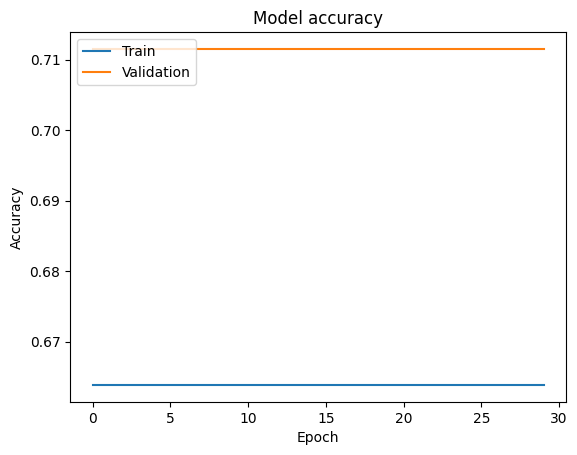

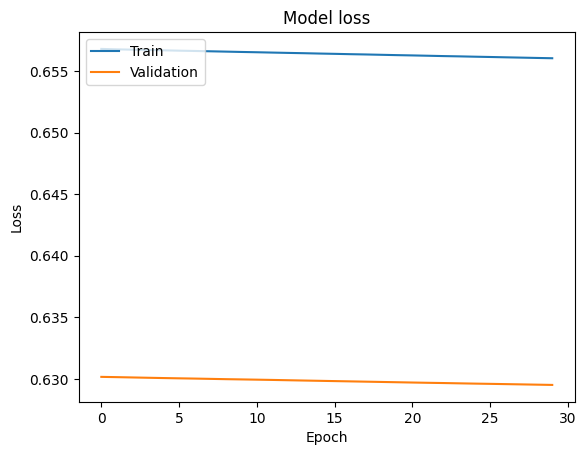

KeyError: 'auc_1'

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation auc values
plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()